In [2]:
#import tensorflow as tf
#print("Num GPUs Available", len(tf.config.experimental.list_physical_devices('GPU')))

In [1]:
import pickle
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense


In [2]:
#pickle.dump(x,open('x_200_scaled.pkl','wb'))

In [3]:
x = pickle.load(open('x_100_scaled.pkl','rb'))
y = pickle.load(open('y_100.pkl','rb'))

In [4]:
#x = pickle.load(open('x_400.pkl','rb'))
#y = pickle.load(open('y_400.pkl','rb'))

In [4]:
x=x[:3000]
y=y[:3000]


In [ ]:
#x=x.tolist()

In [ ]:

#from keras.layers import Conv2D
#from keras.layers import  MaxPool2D
#from keras.layers import  Flatten
#from keras.layers import  Dense
 

In [10]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:], activation='relu'))


model.add(Dense(2,activation='softmax'))

# Loss functons and optimizers

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Fitting the model

history=model.fit(x,y, epochs=2,validation_split=0.1)

#graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# serialize model to JSON
model_json = model.to_json()
with open("model1_full.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1_full.h5")
print("Saved model to disk")

# model 1

In [5]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=x.shape[1:],activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(1,activation='sigmoid'))


# Loss functons and optimizers

In [6]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [7]:
#model.summary()

# Fitting the model

In [7]:
history=model.fit(x,y, epochs=4,validation_split=0.1)

Epoch 1/4
187/187 [==============================] - 50s 246ms/step - loss: 0.5597 - accuracy: 0.7505 - val_loss: 0.4893 - val_accuracy: 0.7519
Epoch 2/4
187/187 [==============================] - 44s 236ms/step - loss: 0.4201 - accuracy: 0.8278 - val_loss: 0.4031 - val_accuracy: 0.8346
Epoch 3/4
187/187 [==============================] - 44s 236ms/step - loss: 0.3631 - accuracy: 0.8608 - val_loss: 0.3716 - val_accuracy: 0.8586
Epoch 4/4
187/187 [==============================] - 44s 236ms/step - loss: 0.3186 - accuracy: 0.8760 - val_loss: 0.3480 - val_accuracy: 0.8827


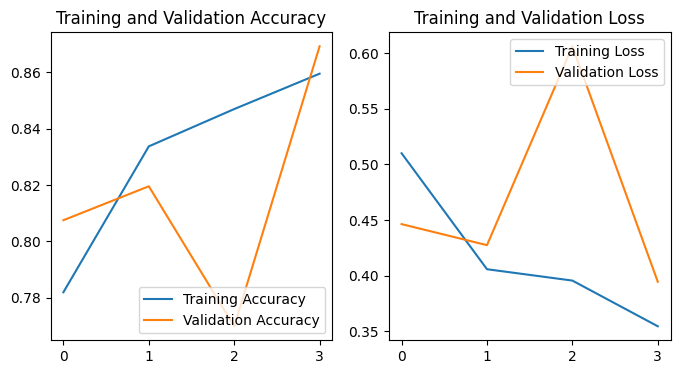

In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(4)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Saving the model

In [12]:
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense
import numpy
import os

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open("model1_full.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1_full.h5")
print("Saved model to disk")

Saved model to disk


# Model preduction

In [47]:
test = pickle.load(open('test_100_scaled.pkl','rb'))

In [48]:
test.shape

(2803, 100, 100, 3)

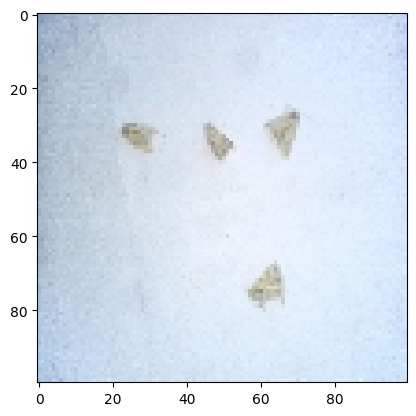

1/1 [==============================] - 0s 23ms/step
[[0.10328329]]
(1, 1)


In [58]:
index=random.randint(0,len(test))

plt.imshow(test[index,:])
plt.show()
pred=model.predict(test[index,:].reshape(1,100,100,3))
print(pred)
type(pred)
print(pred.shape)


# model 1.1

Epoch 1/50
187/187 [==============================] - 17s 90ms/step - loss: 0.5550 - accuracy: 0.7594 - val_loss: 0.4959 - val_accuracy: 0.7639
Epoch 2/50
187/187 [==============================] - 16s 87ms/step - loss: 0.3958 - accuracy: 0.8451 - val_loss: 0.4208 - val_accuracy: 0.8451
Epoch 3/50
187/187 [==============================] - 16s 87ms/step - loss: 0.3760 - accuracy: 0.8556 - val_loss: 0.3744 - val_accuracy: 0.8812
Epoch 4/50
187/187 [==============================] - 16s 87ms/step - loss: 0.3596 - accuracy: 0.8626 - val_loss: 0.4647 - val_accuracy: 0.8090
Epoch 5/50
187/187 [==============================] - 16s 87ms/step - loss: 0.3360 - accuracy: 0.8675 - val_loss: 0.3509 - val_accuracy: 0.8707
Epoch 6/50
187/187 [==============================] - 16s 87ms/step - loss: 0.2866 - accuracy: 0.8894 - val_loss: 0.3681 - val_accuracy: 0.8677
Epoch 7/50
187/187 [==============================] - 16s 87ms/step - loss: 0.2597 - accuracy: 0.9010 - val_loss: 0.3272 - val_accuracy:

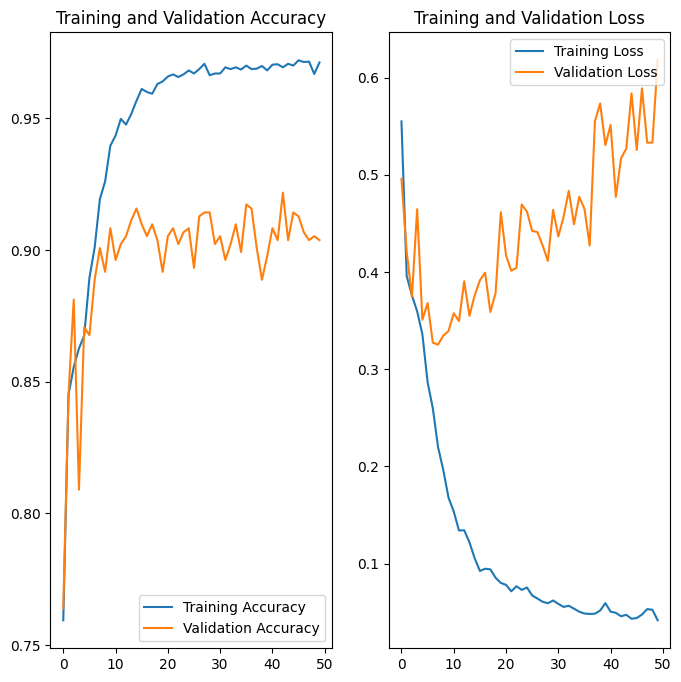

Saved model to disk


In [9]:
model = Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:], activation='relu'))


model.add(Dense(2,activation='softmax'))

# Loss functons and optimizers

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Fitting the model

Epochs=50

history=model.fit(x,y, epochs=Epochs,validation_split=0.1)

#graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# serialize model to JSON
model_json = model.to_json()
with open("model1_full.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model1_full.h5")
print("Saved model to disk")

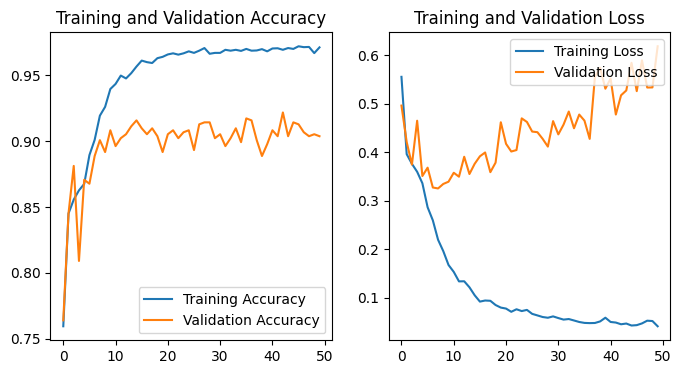

In [11]:
#graphs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(Epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# Model 2

In [8]:
model = Sequential()
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:], activation='relu'))

model.add(Dense(2,activation='softmax'))


In [9]:
model.compile(optimizer='SGD',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x,y, epochs=10,validation_split=0.1)

Epoch 1/10


TypeError: in user code:

    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    TypeError: Exception encountered when calling layer "conv2d" "                 f"(type Conv2D).
    
    Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
    
    Call arguments received by layer "conv2d" "                 f"(type Conv2D):
      • inputs=tf.Tensor(shape=(None, 200, 200, 3), dtype=uint8)


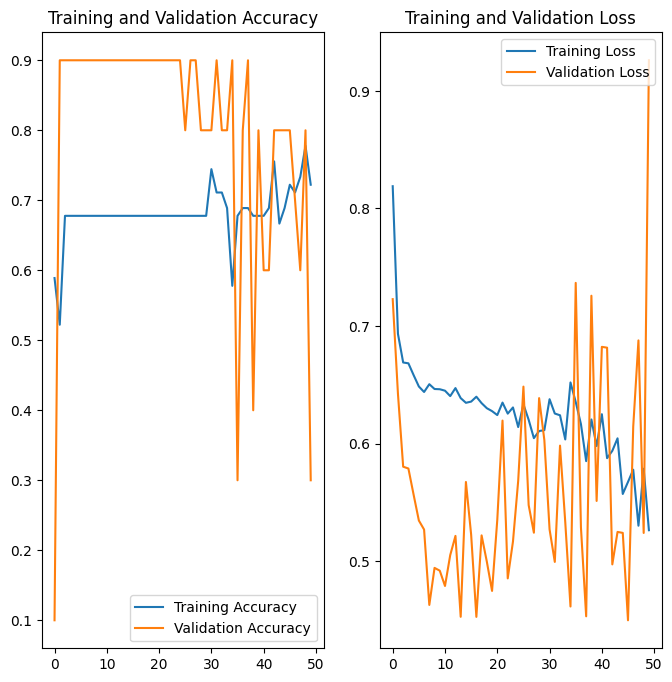

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(50)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# Model 3

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
ann = models.Sequential([
        layers.Flatten(input_shape=(200,200,3)),
        layers.Dense(30, activation='relu'),
        layers.Dense(30, activation='relu'),
        layers.Dense(2, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history=ann.fit(x, y, epochs=5,validation_split=0.1)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

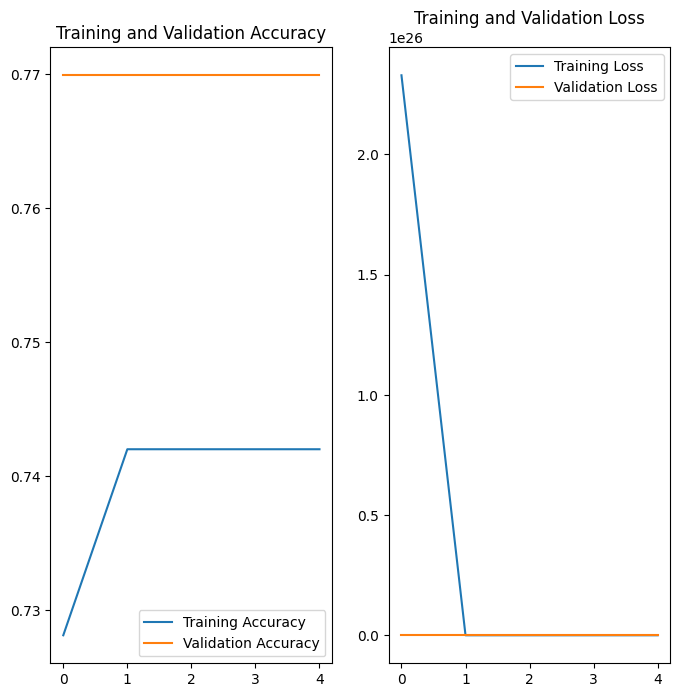

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



# Model 4

In [8]:
model = Sequential()
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:], activation='relu'))

model.add(Dense(2,activation='softmax'))


In [9]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
history=model.fit(x[:3000],y[:3000], epochs=5,batch_size=1000)

Epoch 1/5


TypeError: in user code:

    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "D:\InstalledSoftwares\Anaconda\envs\project\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None

    TypeError: Exception encountered when calling layer "conv2d" "                 f"(type Conv2D).
    
    Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32
    
    Call arguments received by layer "conv2d" "                 f"(type Conv2D):
      • inputs=tf.Tensor(shape=(1000, 200, 200, 3), dtype=uint8)


In [ ]:
num_classes = 2
img_height=100
img_width=100
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()